In [48]:
# from urllib.request import urlopen # was in original directions - redundant with Selenium?

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import time
import re
import os

%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi']= 300

In [12]:
# Create list of urls to scrape
year_list_int = list(range(2002, 2018))
year_list = [str(year) for year in year_list_int]
url_list = [('https://www.baseball-reference.com/leagues/AL/' + year + '.shtml') 
            for year in year_list]

url_list

['https://www.baseball-reference.com/leagues/AL/2002.shtml',
 'https://www.baseball-reference.com/leagues/AL/2003.shtml',
 'https://www.baseball-reference.com/leagues/AL/2004.shtml',
 'https://www.baseball-reference.com/leagues/AL/2005.shtml',
 'https://www.baseball-reference.com/leagues/AL/2006.shtml',
 'https://www.baseball-reference.com/leagues/AL/2007.shtml',
 'https://www.baseball-reference.com/leagues/AL/2008.shtml',
 'https://www.baseball-reference.com/leagues/AL/2009.shtml',
 'https://www.baseball-reference.com/leagues/AL/2010.shtml',
 'https://www.baseball-reference.com/leagues/AL/2011.shtml',
 'https://www.baseball-reference.com/leagues/AL/2012.shtml',
 'https://www.baseball-reference.com/leagues/AL/2013.shtml',
 'https://www.baseball-reference.com/leagues/AL/2014.shtml',
 'https://www.baseball-reference.com/leagues/AL/2015.shtml',
 'https://www.baseball-reference.com/leagues/AL/2016.shtml',
 'https://www.baseball-reference.com/leagues/AL/2017.shtml']

In [2]:
# GOOD VERSION

chromedriver = '/Users/kellyjones/Downloads/chromedriver' # path to the chromedriver executable
os.environ['webdriver.chrome.driver'] = chromedriver

driver = webdriver.Chrome(chromedriver)
driver.implicitly_wait(10)

driver.get('https://www.baseball-reference.com/leagues/AL/2017.shtml')
soup = BeautifulSoup(driver.page_source, 'lxml')
driver.quit()

table_17bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_17pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_17fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [ ]:
# EXPERIMENTAL VERSION

chromedriver = '/Users/kellyjones/Downloads/chromedriver' # path to the chromedriver executable
os.environ['webdriver.chrome.driver'] = chromedriver

driver = webdriver.Chrome(chromedriver)
driver.implicitly_wait(10)

for url in url_list:
    i = 0
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'lxml')
driver.quit()

table_17bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_17pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_17fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [ ]:
for i in range (2):
    

In [ ]:
print(table_17bat)

In [ ]:
print(table_17pit)

In [ ]:
print(table_17fld)

In [ ]:
# BROKEN BROKEN BROKEN BROKEN BROKEN
# Build batting DF - try to get 1st column
column_headers_bat = [th.getText() for th in 
                  table_17bat.findAll('tr')[0].findAll('th')][:] # not sure if last [:] needed
team_name = [[td.getText() for td in table_17bat.findAll('tr')][0]]
data_rows_bat = table_17bat.findAll('tr')[1:-2]  # skip row1 header and last 2 summary rows
player_data_bat = team_name + [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat = pd.DataFrame(player_data_bat, columns=column_headers_bat)
df_bat.head()
# Need to get team names from first cell which is hyperlinked
# Try this https://stackoverflow.com/questions/11716380/python-beautifulsoup-extract-text-from-anchor-tag
# Or this https://stackoverflow.com/questions/13240700/python-beautifulsoup-to-find-all-a-href-with-specific-anchor-text

In [13]:
# Build batting DF
column_headers_bat = [th.getText() for th in 
                  table_17bat.findAll('tr')[0].findAll('th')][1:] # not sure if last [:] needed
data_rows_bat = table_17bat.findAll('tr')[1:-2]  # skip row1 header and last 2 summary rows
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat = pd.DataFrame(player_data_bat, columns=column_headers_bat)
df_bat.head()
# Need to get team names from first cell which is hyperlinked - SEE ABOVE

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,50,28.6,4.59,162,6140,5650,743,1469,269,12,...,.435,.747,99,2458,138,50,10,37,12,1041
1,49,27.3,4.85,162,6338,5669,785,1461,302,19,...,.407,.736,91,2305,141,53,9,36,48,1134
2,51,26.7,4.36,162,6059,5513,706,1412,256,37,...,.417,.731,96,2300,124,76,35,33,17,1055
3,41,28.0,5.05,162,6234,5511,818,1449,333,29,...,.449,.788,105,2476,125,50,23,45,30,1158
4,49,29.6,4.54,162,6150,5556,735,1435,289,35,...,.424,.748,96,2355,128,52,11,27,21,1104


In [17]:
# Build pitching DF
column_headers_pit = [th.getText() for th in 
                  table_17pit.findAll('tr')[0].findAll('th')][1:] # not sure if last [:] needed
data_rows_pit = table_17pit.findAll('tr')[1:-2]  # skip row1 header and last 2 summary rows
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit = pd.DataFrame(player_data_pit, columns=column_headers_pit)
df_pit

,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,26,28.2,5.19,75,87,.463,4.97,162,162,161,...,6293,87,4.96,1.446,9.4,1.5,3.6,7.7,2.13,1129
1,27,28.4,4.12,93,69,.574,3.70,162,162,157,...,6217,125,3.78,1.247,8.4,1.2,2.8,9.6,3.40,1102
2,31,28.7,5.06,67,95,.414,4.78,162,162,162,...,6200,90,5.17,1.418,8.8,1.5,4.0,7.6,1.89,1115
3,20,28.9,3.48,102,60,.630,3.30,162,162,155,...,5866,137,3.33,1.161,7.9,1.0,2.5,10.1,3.98,980
4,29,28.3,5.52,64,98,.395,5.36,162,162,160,...,6298,85,4.73,1.496,10.1,1.4,3.4,7.6,2.23,1143
5,27,28.5,4.32,101,61,.623,4.12,162,162,161,...,6111,96,3.91,1.270,8.2,1.2,3.2,9.9,3.05,1073
6,29,30.3,4.88,80,82,.494,4.61,162,162,161,...,6218,100,4.43,1.390,9.3,1.2,3.2,7.6,2.34,1114
7,31,29.1,4.38,80,82,.494,4.20,162,162,161,...,6030,101,4.43,1.279,8.6,1.4,2.9,8.2,2.79,999
8,36,29.6,4.86,85,77,.525,4.59,162,162,156,...,6205,97,4.72,1.372,9.3,1.4,3.0,7.3,2.41,1109
9,25,27.8,4.07,91,71,.562,3.72,162,162,160,...,6078,121,3.88,1.209,7.8,1.2,3.1,9.7,3.10,1072


In [ ]:
# Build fielding DF

## EDA for Pitching

In [40]:
df_pit_sm = df_pit[['#P', 'RA/G', 'W-L%', 'ERA', 'ERA+']]

In [41]:
df_pit_sm

,#P,RA/G,W-L%,ERA,ERA+
0,26,5.19,.463,4.97,87
1,27,4.12,.574,3.70,125
2,31,5.06,.414,4.78,90
3,20,3.48,.630,3.30,137
4,29,5.52,.395,5.36,85
5,27,4.32,.623,4.12,96
6,29,4.88,.494,4.61,100
7,31,4.38,.494,4.20,101
8,36,4.86,.525,4.59,97
9,25,4.07,.562,3.72,121


In [42]:
df_pit_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
#P      15 non-null object
RA/G    15 non-null object
W-L%    15 non-null object
ERA     15 non-null object
ERA+    15 non-null object
dtypes: object(5)
memory usage: 680.0+ bytes


In [43]:
# Change datatype from object to floats/ints

df_pit_sm[['#P', 'ERA+']] = df_pit_sm[['#P', 'ERA+']].astype(int)
df_pit_sm[['RA/G', 'W-L%', 'ERA']] = df_pit_sm[['RA/G', 'W-L%', 'ERA']].astype(float)

df_pit_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
#P      15 non-null int64
RA/G    15 non-null float64
W-L%    15 non-null float64
ERA     15 non-null float64
ERA+    15 non-null int64
dtypes: float64(3), int64(2)
memory usage: 680.0 bytes


/Users/kellyjones/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [44]:
df_pit_sm

,#P,RA/G,W-L%,ERA,ERA+
0,26,5.19,0.463,4.97,87
1,27,4.12,0.574,3.70,125
2,31,5.06,0.414,4.78,90
3,20,3.48,0.630,3.30,137
4,29,5.52,0.395,5.36,85
5,27,4.32,0.623,4.12,96
6,29,4.88,0.494,4.61,100
7,31,4.38,0.494,4.20,101
8,36,4.86,0.525,4.59,97
9,25,4.07,0.562,3.72,121


#### Analysis
Based on heatmap below, looking at middle row for W-L%, I will definitely **not** include number of pitchers in my model. I will likely include RA/G or ERA which are highly correlated at -.87 and -.85 respectively.

In [13]:
sns.heatmap(df_pit_sm.corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

NameError: name 'sns' is not defined

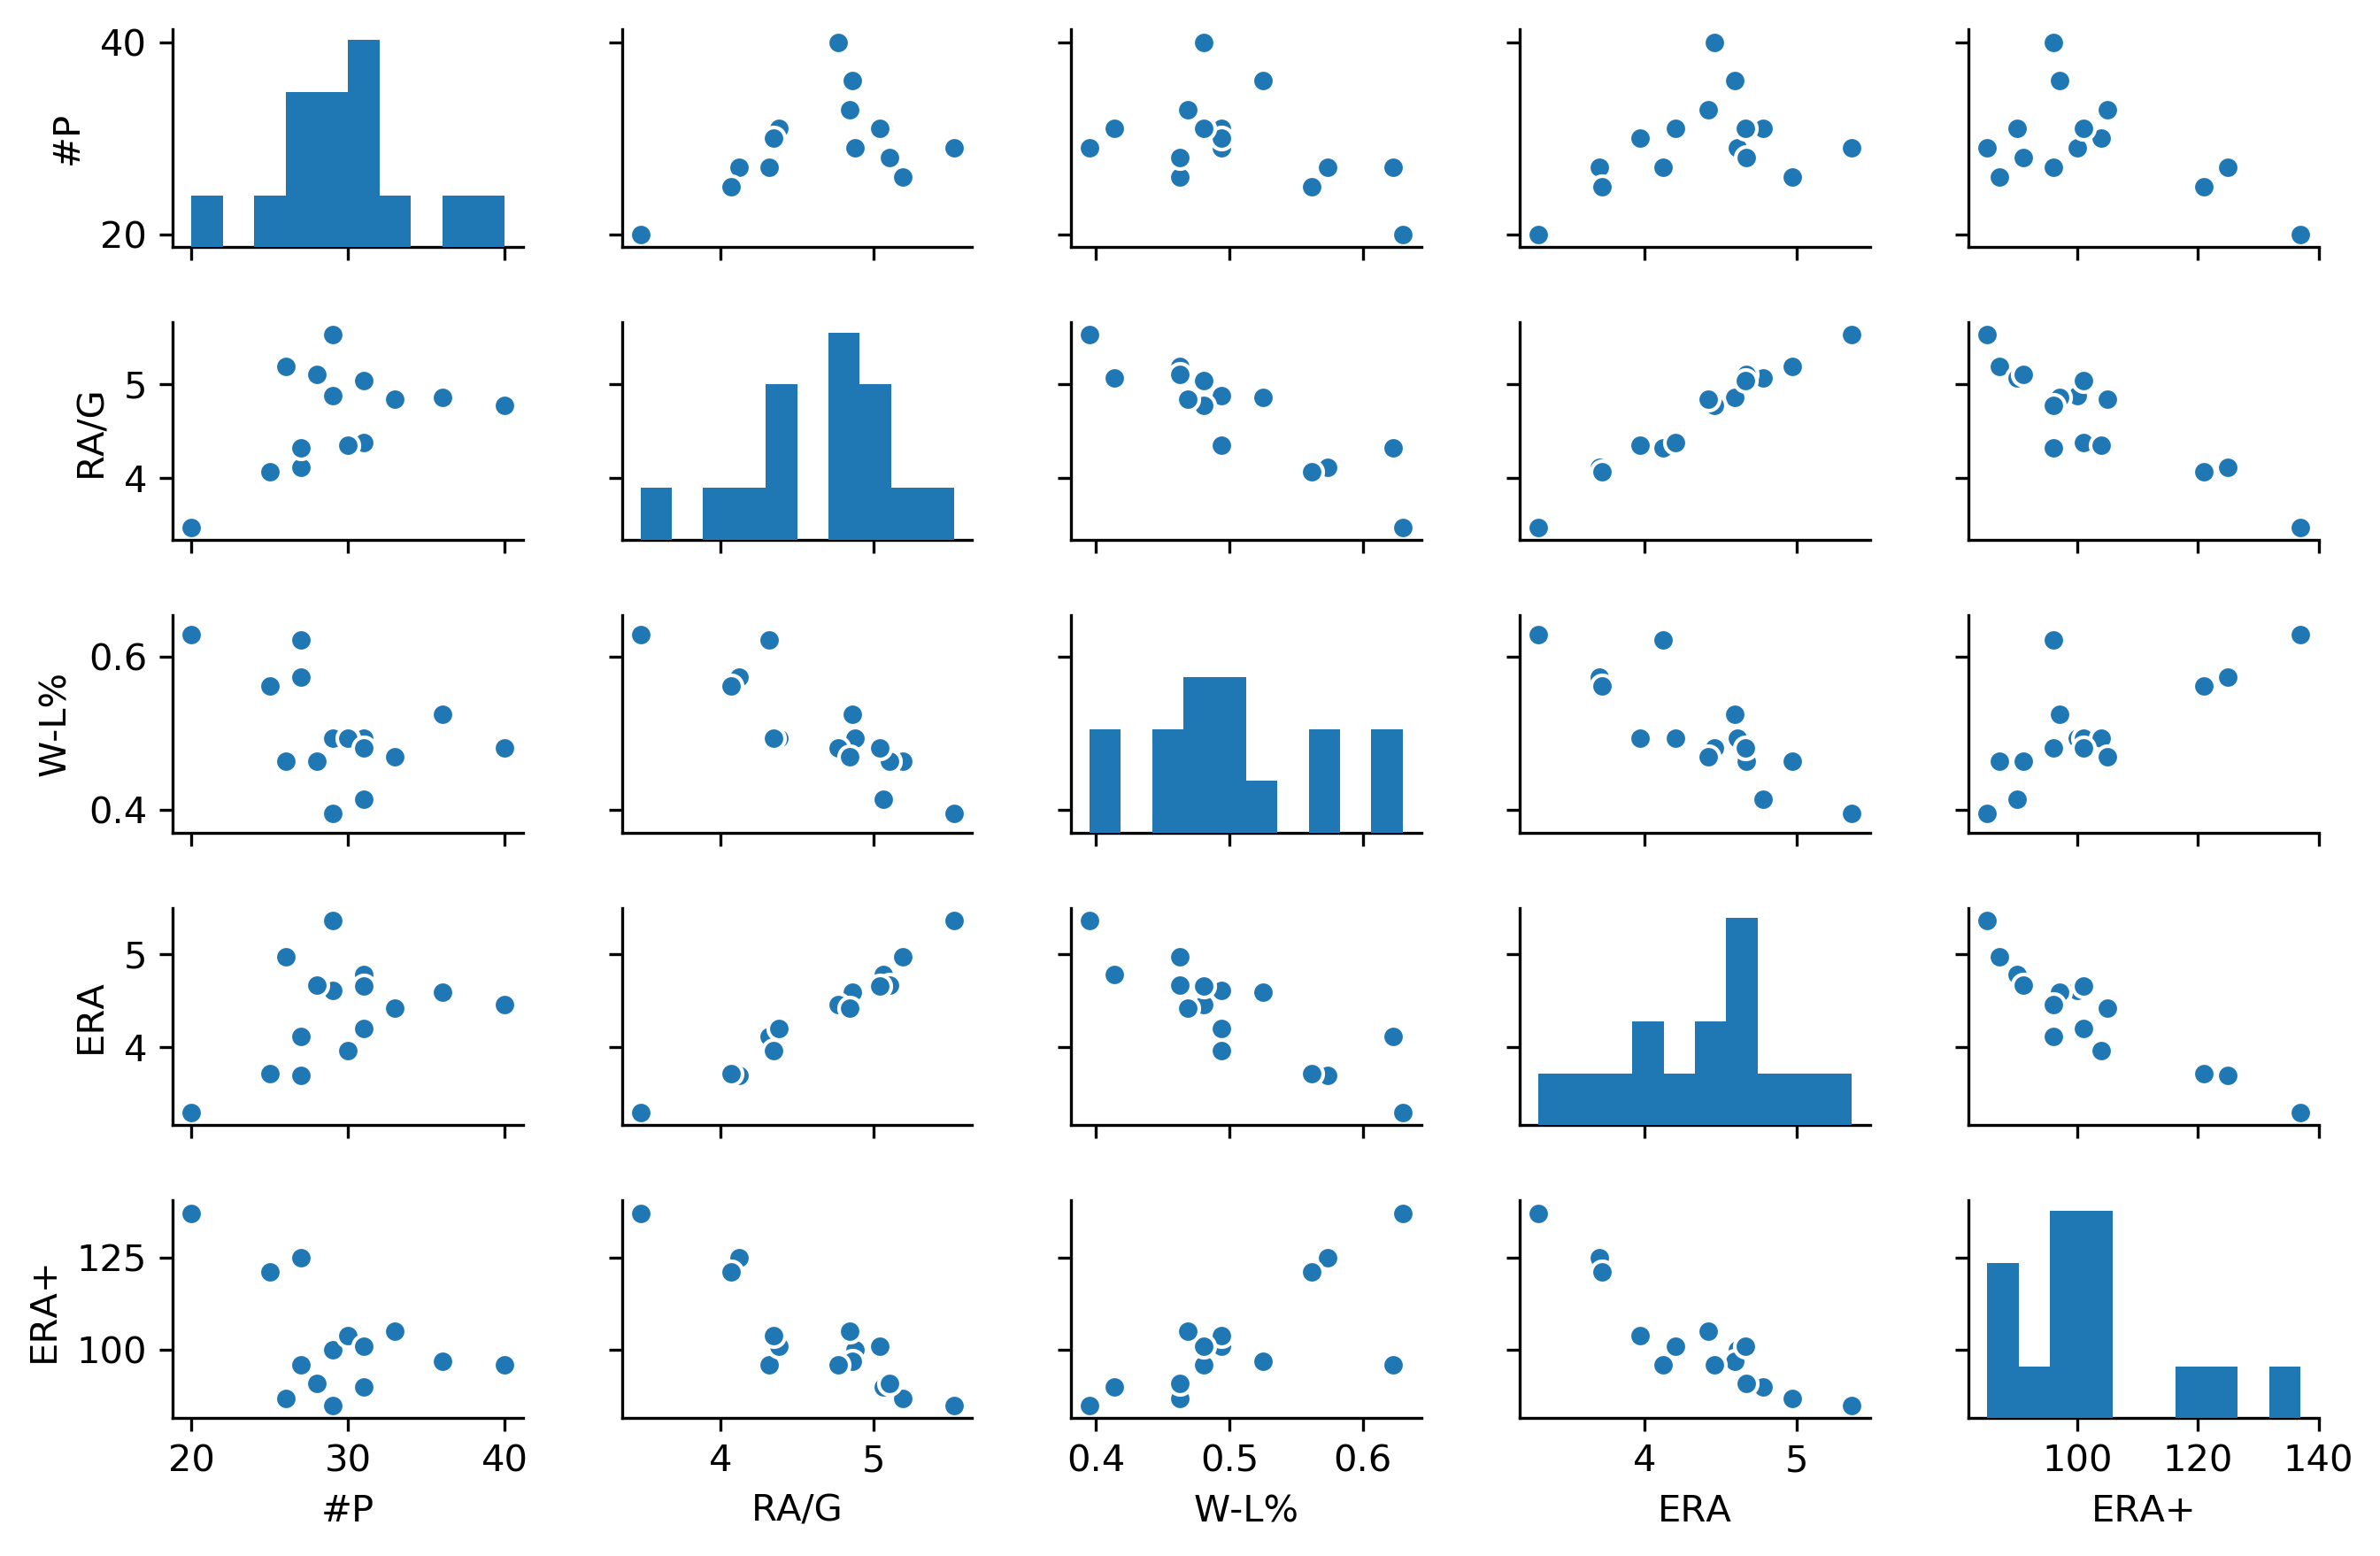

In [50]:
sns.pairplot(df_pit_sm, size = 1.2, aspect=1.5);